In [4]:
def svcDS(task='taskname', trainList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'], predictList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']):
    from sklearn.svm import LinearSVC
    import numpy as np
    import reshape
    import plotFW
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import cross_validate
    from sklearn import metrics
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    clf = LinearSVC()
    cvTable=[]
    accTable=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +task+ '/' +i+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((taskFC, restFC))
        taskSize=taskFC.shape[0]
        restSize=restFC.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        clf.fit(x_train, y_train)
        #Cross validation
        CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        #Obtain feature weights within folds
        #folds=cross_validate(clf, x_train, y_train, cv=taskSize, return_estimator=True)
        #plotFW.fwFolds(folds, 'DS', task, i)
        #Obtain coefficients (feature weights)
        coef = clf.coef_
        #Plot feature weights
        plotFW.feature_plots(coef, 'DS', task, i)
        plotFW.saveFW(coef, 'DS', task, i)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        """
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+task+'/'+j+'_parcel_corrmat.mat')
            #and all rest files
            test_restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/'+j+'_parcel_corrmat.mat')
            #Create testing dataset
            x_test=np.concatenate((test_taskFC, test_restFC))
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_restFC.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=clf.predict(x_test)
            # Use score method to get accuracy of model
            score = clf.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            plt.savefig("/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/images/SVC/cm/DS/" +task+ '_train' +i+ '_test_' +j+ '.png')
            """
        #tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        #accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    #accTable=pd.concat(accTable, axis=1)
    #accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/DS/'+task+'_accTable_diff_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    #cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/DS/'+task+'_cvTable_folds.csv')


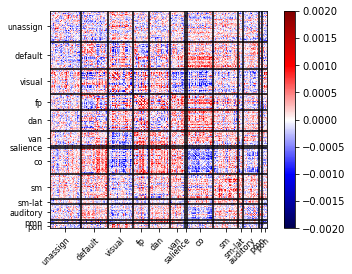

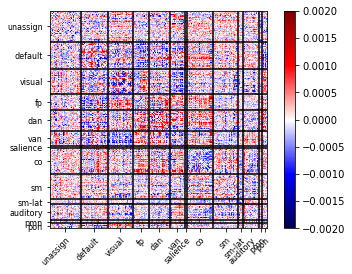

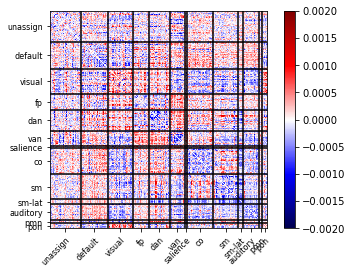

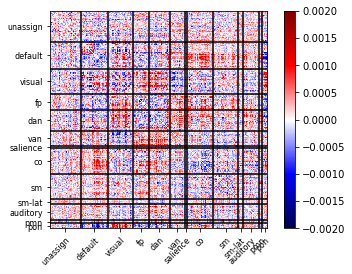

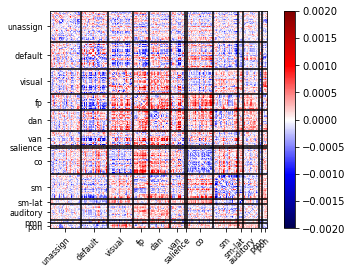

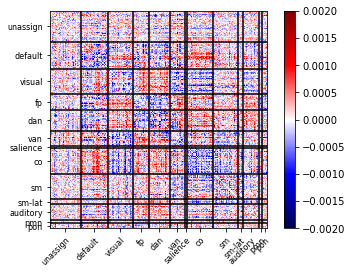

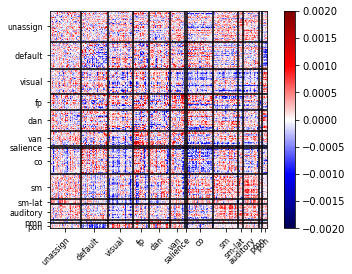

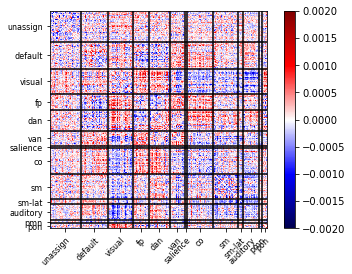

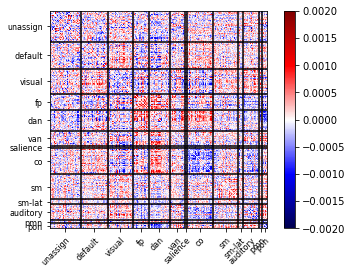

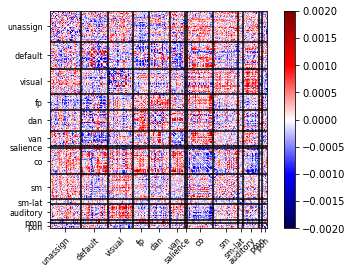

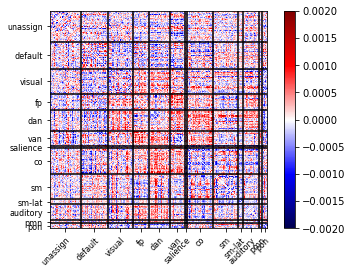

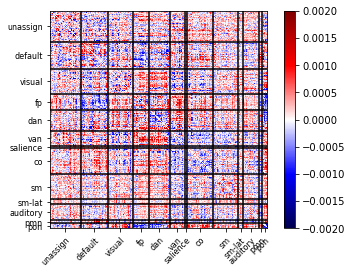

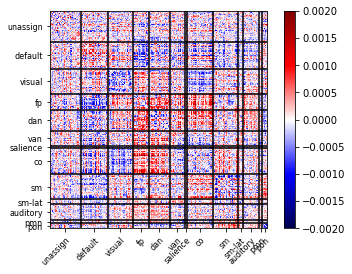

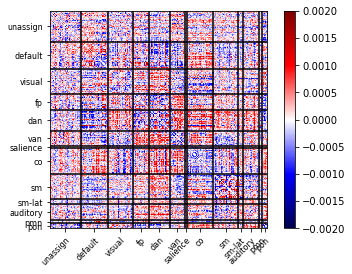

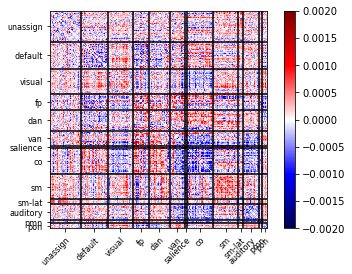

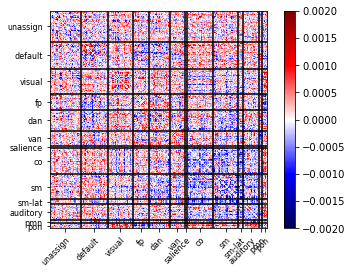

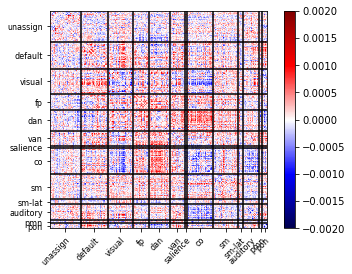

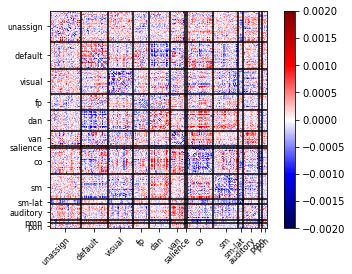

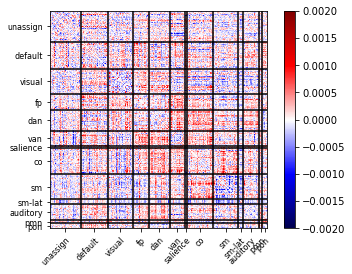

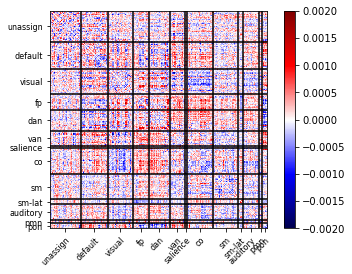

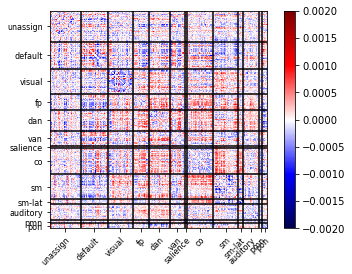

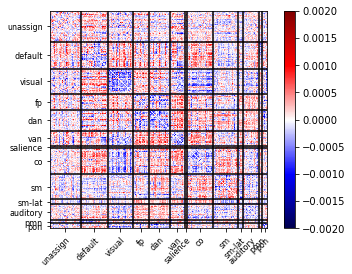

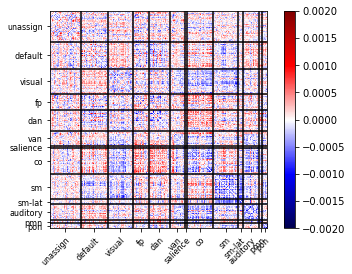

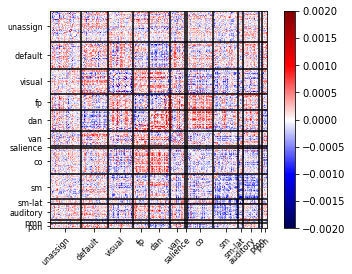

In [5]:
taskName=['mem','mixed','motor']
for t in taskName:
    svcDS(t)

In [ ]:
def svcSS(subid='sub', trainList=['mem','mixed','motor'], predictList=['mem','mixed','motor']):
    from sklearn.svm import LinearSVC
    import numpy as np
    import reshape
    import pandas as pd
    import matplotlib.pyplot as plt
    import plotFW
    import seaborn as sns
    from sklearn.model_selection import cross_val_score
    from sklearn import metrics
    from sklearn.model_selection import train_test_split
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
    clf = LinearSVC()
    cvTable=[]
    accTable=[]
    for i in trainList:
        #Load task FC
        taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/' +i+ '/' +subid+ '_parcel_corrmat.mat')
        #Load rest
        restFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +subid+ '_parcel_corrmat.mat')
        #because were within subject lets save 2 days of rest randomely to use for the testing set
        train_rest, test_rest = train_test_split(restFC, test_size=.2)
        #to match training task set with training rest set
        train_task, trash = train_test_split(taskFC, test_size=.2)
        #Create a training dataset targets 1/0 ==task/rest, chunk=#days
        x_train=np.concatenate((train_task, train_rest))
        taskSize=train_task.shape[0]
        restSize=train_rest.shape[0]
        t = np.ones(taskSize, dtype = int)
        r=np.zeros(restSize, dtype=int)
        y_train = np.concatenate((t,r))
        clf.fit(x_train, y_train)
        CVscores=cross_val_score(clf, x_train, y_train, cv=taskSize)
        coef = clf.coef_
        #Plot feature weights
        plotFW.feature_plots(coef, 'SS', i, subid)
        acc_scores_per_task=[]
        #Lets loop through all scenerios for sub and task of interest
        for j in predictList:
            #Load testing set
            test_taskFC=reshape.matFiles('/Users/aporter1350/Desktop/MSC_Alexis/analysis/data/mvpa_data/'+j+'/'+subid+'_parcel_corrmat.mat')
            x_test=np.concatenate((test_taskFC, test_rest))
            #Create testing dataset
            ttaskSize=test_taskFC.shape[0]
            trestSize=test_rest.shape[0]
            tt = np.ones(ttaskSize, dtype = int)
            tr=np.zeros(trestSize, dtype=int)
            y_test = np.concatenate((tt,tr))
            p=clf.predict(x_test)
            # Use score method to get accuracy of model
            score = clf.score(x_test, y_test)
            acc_scores_per_task.append(score)
            #construct a confusion matrix
            cm = metrics.confusion_matrix(y_test, p)
            plt.figure(figsize=(9,9))
            sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
            plt.ylabel('Actual label');
            plt.xlabel('Predicted label');
            all_sample_title = 'Accuracy Score: {0}'.format(score)
            plt.title(all_sample_title, size = 15);
            plt.savefig("/Users/aporter1350/Desktop//MSC_Alexis/analysis/output/images/SVC/cm/SS/" +i+ '_train' +j+ '_test_' +subid+ '.png')
        tmp_df=pd.DataFrame({'Test_variables':predictList, i:acc_scores_per_task}).set_index('Test_variables')
        accTable.append(tmp_df)
        cv_tmp_df=pd.DataFrame({i:CVscores})
        cvTable.append(cv_tmp_df)
    accTable=pd.concat(accTable, axis=1)
    accTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/'+subid+'_accTable_same_sub.csv')
    cvTable=pd.concat(cvTable, axis=1)
    cvTable.to_csv('/Users/aporter1350/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/SS/'+subid+'_cvTable_folds.csv')




In [ ]:
subs=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
for sub in subs:
    svcSS(sub)

In [7]:
from sklearn.svm import LinearSVC
import numpy as np
import reshape
import pandas as pd
import matplotlib.pyplot as plt
import plotFW
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
clf = LinearSVC()
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
def testMix(taskFC, restFC, i):
    acc_scores_per_task=[]
    x_train, y_train=reshape.concateFC(taskFC, restFC)
    clf.fit(x_train, y_train)
    #Cross validation to keep simple we'll do 10 fold
    CVscores=cross_val_score(clf, x_train, y_train, cv=10)
    for j in subList:
        if i == j:
            #if your subs are the same don't include rest...avoid overfitting!
            mixFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mixed/' +j+ '_parcel_corrmat.mat')
            x_test=mixFC
            taskSize=x_test.shape[0]
            y_test=np.ones(taskSize, dtype=int)
        else:
            mixFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mixed/' +j+ '_parcel_corrmat.mat')
            rFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +j+ '_parcel_corrmat.mat')
            x_test, y_test=reshape.concateFC(mixFC, rFC)
        clf.predict(x_test)
        # Use score method to get accuracy of model
        score = clf.score(x_test, y_test)
        acc_scores_per_task.append(score)
    tmp_df=pd.DataFrame({'Test_variables_mixed':subList, i:acc_scores_per_task}).set_index('Test_variables_mixed')
    return tmp_df


def testMem(taskFC, restFC, i):
    acc_scores_per_task=[]
    x_train, y_train=reshape.concateFC(taskFC, restFC)
    clf.fit(x_train, y_train)
    #Cross validation
    CVscores=cross_val_score(clf, x_train, y_train, cv=10)
    for j in subList:
        if i == j:
            #if your subs are the same don't include rest...avoid overfitting!
            memFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/' +j+ '_parcel_corrmat.mat')
            x_test=memFC
            taskSize=x_test.shape[0]
            y_test=np.ones(taskSize, dtype=int)
        else:
            memFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/' +j+ '_parcel_corrmat.mat')
            rFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +j+ '_parcel_corrmat.mat')
            x_test, y_test=reshape.concateFC(memFC, rFC)
        clf.predict(x_test)
        # Use score method to get accuracy of model
        score = clf.score(x_test, y_test)
        acc_scores_per_task.append(score)
    tmp_df=pd.DataFrame({'Test_variables_mem':subList, i:acc_scores_per_task}).set_index('Test_variables_mem')
    return tmp_df



def testMot(taskFC, restFC, i):
    acc_scores_per_task=[]
    x_train, y_train=reshape.concateFC(taskFC, restFC)
    clf.fit(x_train, y_train)
    #Cross validation
    CVscores=cross_val_score(clf, x_train, y_train, cv=10)
    for j in subList:
        if i == j:
            #if your subs are the same don't include rest...avoid overfitting!
            motFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/' +j+ '_parcel_corrmat.mat')
            x_test=motFC
            taskSize=x_test.shape[0]
            y_test=np.ones(taskSize, dtype=int)
        else:
            motFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/' +j+ '_parcel_corrmat.mat')
            rFC=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +j+ '_parcel_corrmat.mat')
            x_test, y_test=reshape.concateFC(motFC, rFC)
        clf.predict(x_test)
        # Use score method to get accuracy of model
        score = clf.score(x_test, y_test)
        acc_scores_per_task.append(score)
    tmp_df=pd.DataFrame({'Test_variables_motor':subList, i:acc_scores_per_task}).set_index('Test_variables_motor')
    return tmp_df

In [8]:
import reshape
import pandas as pd
import numpy as np
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
#train motor
acc_mot_mix=[]
acc_mot_mem=[]
#train mix
acc_mix_mot=[]
acc_mix_mem=[]
#train mem
acc_mem_mix=[]
acc_mem_mot=[]
for i in subList:
    #Load all task FC for sub
    motor=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/motor/' +i+ '_parcel_corrmat.mat')
    mixed=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mixed/' +i+ '_parcel_corrmat.mat')
    mem=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/mem/' +i+ '_parcel_corrmat.mat')
    rest=reshape.matFiles('/Users/Alexis/Desktop/MSC_Alexis/analysis/data/mvpa_data/rest/' +i+ '_parcel_corrmat.mat')
    #train motor
    #test mix
    tmp_mot_mix=testMix(motor, rest, i)
    acc_mot_mix.append(tmp_mot_mix)
    #test mem
    tmp_mot_mem=testMem(motor, rest, i)
    acc_mot_mem.append(tmp_mot_mem)
    
    #train mix
    #test motor
    tmp_mix_mot=testMot(mixed, rest, i)
    acc_mix_mot.append(tmp_mix_mot)
    #test mem
    tmp_mix_mem=testMem(mixed, rest, i)
    acc_mix_mem.append(tmp_mix_mem)
    
    #train mem
    #test motor
    tmp_mem_mot=testMot(mem, rest, i)
    acc_mem_mot.append(tmp_mem_mot)
    #test mix
    tmp_mem_mix=testMix(mem, rest, i)
    acc_mem_mix.append(tmp_mem_mix)
    
#train motor test mix    
acc_mot_mix=pd.concat(acc_mot_mix, axis=1)
acc_mot_mix.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/motor_train_test_mixed.csv')
#train motor test mem
acc_mot_mem=pd.concat(acc_mot_mem, axis=1)
acc_mot_mem.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/motor_train_test_mem.csv')

#train mix test motor    
acc_mix_mot=pd.concat(acc_mix_mot, axis=1)
acc_mix_mot.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/mixed_train_test_motor.csv')
#train mix test mem
acc_mix_mem=pd.concat(acc_mix_mem, axis=1)
acc_mix_mem.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/mixed_train_test_mem.csv')

#train mem test motor    
acc_mem_mot=pd.concat(acc_mem_mot, axis=1)
acc_mem_mot.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/mem_train_test_motor.csv')
#train mem test mix
acc_mem_mix=pd.concat(acc_mem_mix, axis=1)
acc_mem_mix.to_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVC/acc/BS/mem_train_test_mixed.csv')


In [4]:
acc_mem_mix

MSC01  MSC02  MSC03  MSC04  MSC05  MSC06  MSC07  MSC10
Test_variables_Mixed                                                        
MSC01                  0.90   0.75   0.65   0.50   0.80   0.70   0.90   0.55
MSC02                  0.70   0.50   0.45   0.50   0.75   0.55   0.70   0.55
MSC03                  0.65   0.85   0.30   0.65   0.95   0.55   0.60   0.60
MSC04                  0.70   0.85   0.70   0.90   0.80   0.65   0.65   0.65
MSC05                  0.60   0.95   0.75   0.50   0.70   0.50   0.75   0.75
MSC06                  0.50   0.80   0.80   0.75   0.80   0.50   0.55   0.55
MSC07                  1.00   0.90   0.55   0.70   0.85   0.95   0.90   0.55
MSC10                  0.80   0.65   0.90   0.90   0.90   0.85   0.65   0.50